# Customer Personality Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* **xyz** company wants to enable and establish a viable business model to expand the customer base. 
* One of the ways to expand the customer base is to introduce a new offering of packages based on the customer personalities. 
* The company wants to segregate the customers so that they can release relevant offers for the respective customers

### **What is Customer personality analysis and segmentation?**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## 2. Data Collection
- The dataset is downloaded from https://github.com/entbappy/Branching-tutorial/blob/master/marketing_campaign.zip

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [ ]:
# %pip install pandas numpy matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**We will set the pandas.set_option to display 100 rows or columns. By default it is 60**

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

**Import the CSV Data as Pandas DataFrame**

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

**Show Top 5 Records**

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Shape of the dataset**

In [ ]:
df.shape

(2240, 29)

**Summary of the dataset**

In [ ]:
# Display summary statistics for a dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Check Datatypes in the dataset**

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 3. EXPLORING DATA

**Let's convert the datetime column to pandas datetime format**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
#let's check the datatype
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 26 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

We have 2 categorical features : ['Education', 'Marital_Status']


### Feature Information

- **People**

    - **ID:** Customer's unique identifier
    - **Year_Birth:** Customer's birth year
    - **Education:** Customer's education level
    - **Marital_Status:** Customer's marital status
    - **Income:** Customer's yearly household income
    - **Kidhome:** Number of children in customer's household
    - **Teenhome:** Number of teenagers in customer's household
    - **Dt_Customer:** Date of customer's enrollment with the company
    - **Recency:** Number of days since customer's last purchase
    - **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

- **Products**

    - **MntWines:** Amount spent on wine in last 2 years
    - **MntFruits:** Amount spent on fruits in last 2 years
    - **MntMeatProducts:** Amount spent on meat in last 2 years
    - **MntFishProducts:** Amount spent on fish in last 2 years
    - **MntSweetProducts:** Amount spent on sweets in last 2 years
    - **MntGoldProds:** Amount spent on gold in last 2 years

- **Promotion**

    - **NumDealsPurchases:** Number of purchases made with a discount
    - **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

- **Place**

    - **NumWebPurchases:** Number of purchases made through the company’s website
    - **NumCatalogPurchases:** Number of purchases made using a catalogue
    - **NumStorePurchases:** Number of purchases made directly in stores
    - **NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df[categorical_features[0]].value_counts().count()

np.int64(5)

In [ ]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Education
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: proportion, dtype: float64
---------------------------
Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: proportion, dtype: float64
---------------------------


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=2.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

*Report of the univariate analytis*
1. `Year_Birth` is left-skewed, most of the values falls in 1940-2000 range and has outliers.
2. `Income` is right-skewed, most of the values falls in 0 - <200000 range and has outliers.
3. `Kidhome`, `Teenhome` has constant values. Most of the values seems to be 0 or 1 and some of the values are 2.
4. `Dt_customer`, `Recency` are following a normal distribution
5. `MntWines`, `MntMeatProducts` are right-skewed, most of the values falls in 0 - 500 range and has outliers.
6. `MntFruits`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` is right-skewed, most of the values falls in 0-50 range and has outliers.
7. `NumDealsPurchases` is right-skewed, most of the values falls in 0-5 range and has outliers.
8. `NumWebPurchases`, `NumCatalogPurchases` are right skewed and most of the values falls in 0-10 range and have outliers.
9. `NumStorePurchases` is almost following a normal distribution and most of the values falls in 1 - 10 range and has outliers.
10. `NumWebVisitsMonth` is right-skewed, most of the values falls in 0- 10 range and has outliers.
11. `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`,`AcceptedCmp2` is right skewed and most of the values are 0 and some of the values are 1.
12. `Complain` has most of the values as 0 and we can see a little bit of the values as 1. 
13. `Z_CostContact`, `Z_Revenue` columns are not showing any graph. We'll graph those seperately and check what is happening.
14. `Response` has constant values as 0 and 1. 

In [ ]:
df.Z_CostContact.plot()

<Axes: xlabel='Response', ylabel='Density'>

In [ ]:
df.Z_Revenue.plot()

<Axes: xlabel='Response', ylabel='Density'>

**As we can see**
- The column ```Z_CostContact```, ```Z_Revenue``` does have constant values. As this columns does not have any varience, we can drop this column

In [ ]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Categorical Features

In [ ]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Report**
- For column **``Education``**
    - Most of the Customers are falling into **Graduation** category.
    - Respectively, **PhD, Master Education, Basic and *2n Cycle** are also present.
    
    _2nCycle_ -  Multidisciplinary degree programmes are second cycle degree programmes in which the teaching system meets the requirements of two different classes
    
- For column **```Maritial_Status```**
    - For about **864** customers are married. 
    - **Together, single, divorced, widow** are noticeable where **Alone, Absurd and YOLO** categories are very less.

### Count of features based on years

In [ ]:
df1 = df.copy()
df1["Year"] = df1.Dt_Customer.dt.year
customer_joined_per_year = df1.groupby(by="Year", axis=0)[['ID']].count()
customer_joined_per_year = customer_joined_per_year.reset_index()
customer_joined_per_year.columns = ['YEAR','CUSTOMER_JOINED']
sns.barplot(data = customer_joined_per_year, x = customer_joined_per_year['YEAR'], y = customer_joined_per_year['CUSTOMER_JOINED'])

<Axes: xlabel='Marital_Status', ylabel='count'>

**Report**
- By this report, we can say that, most number of customers have joined in the year **2013**
- The number of customers got increased in year 2013 but in the year 2014, the number of customers got decreased.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

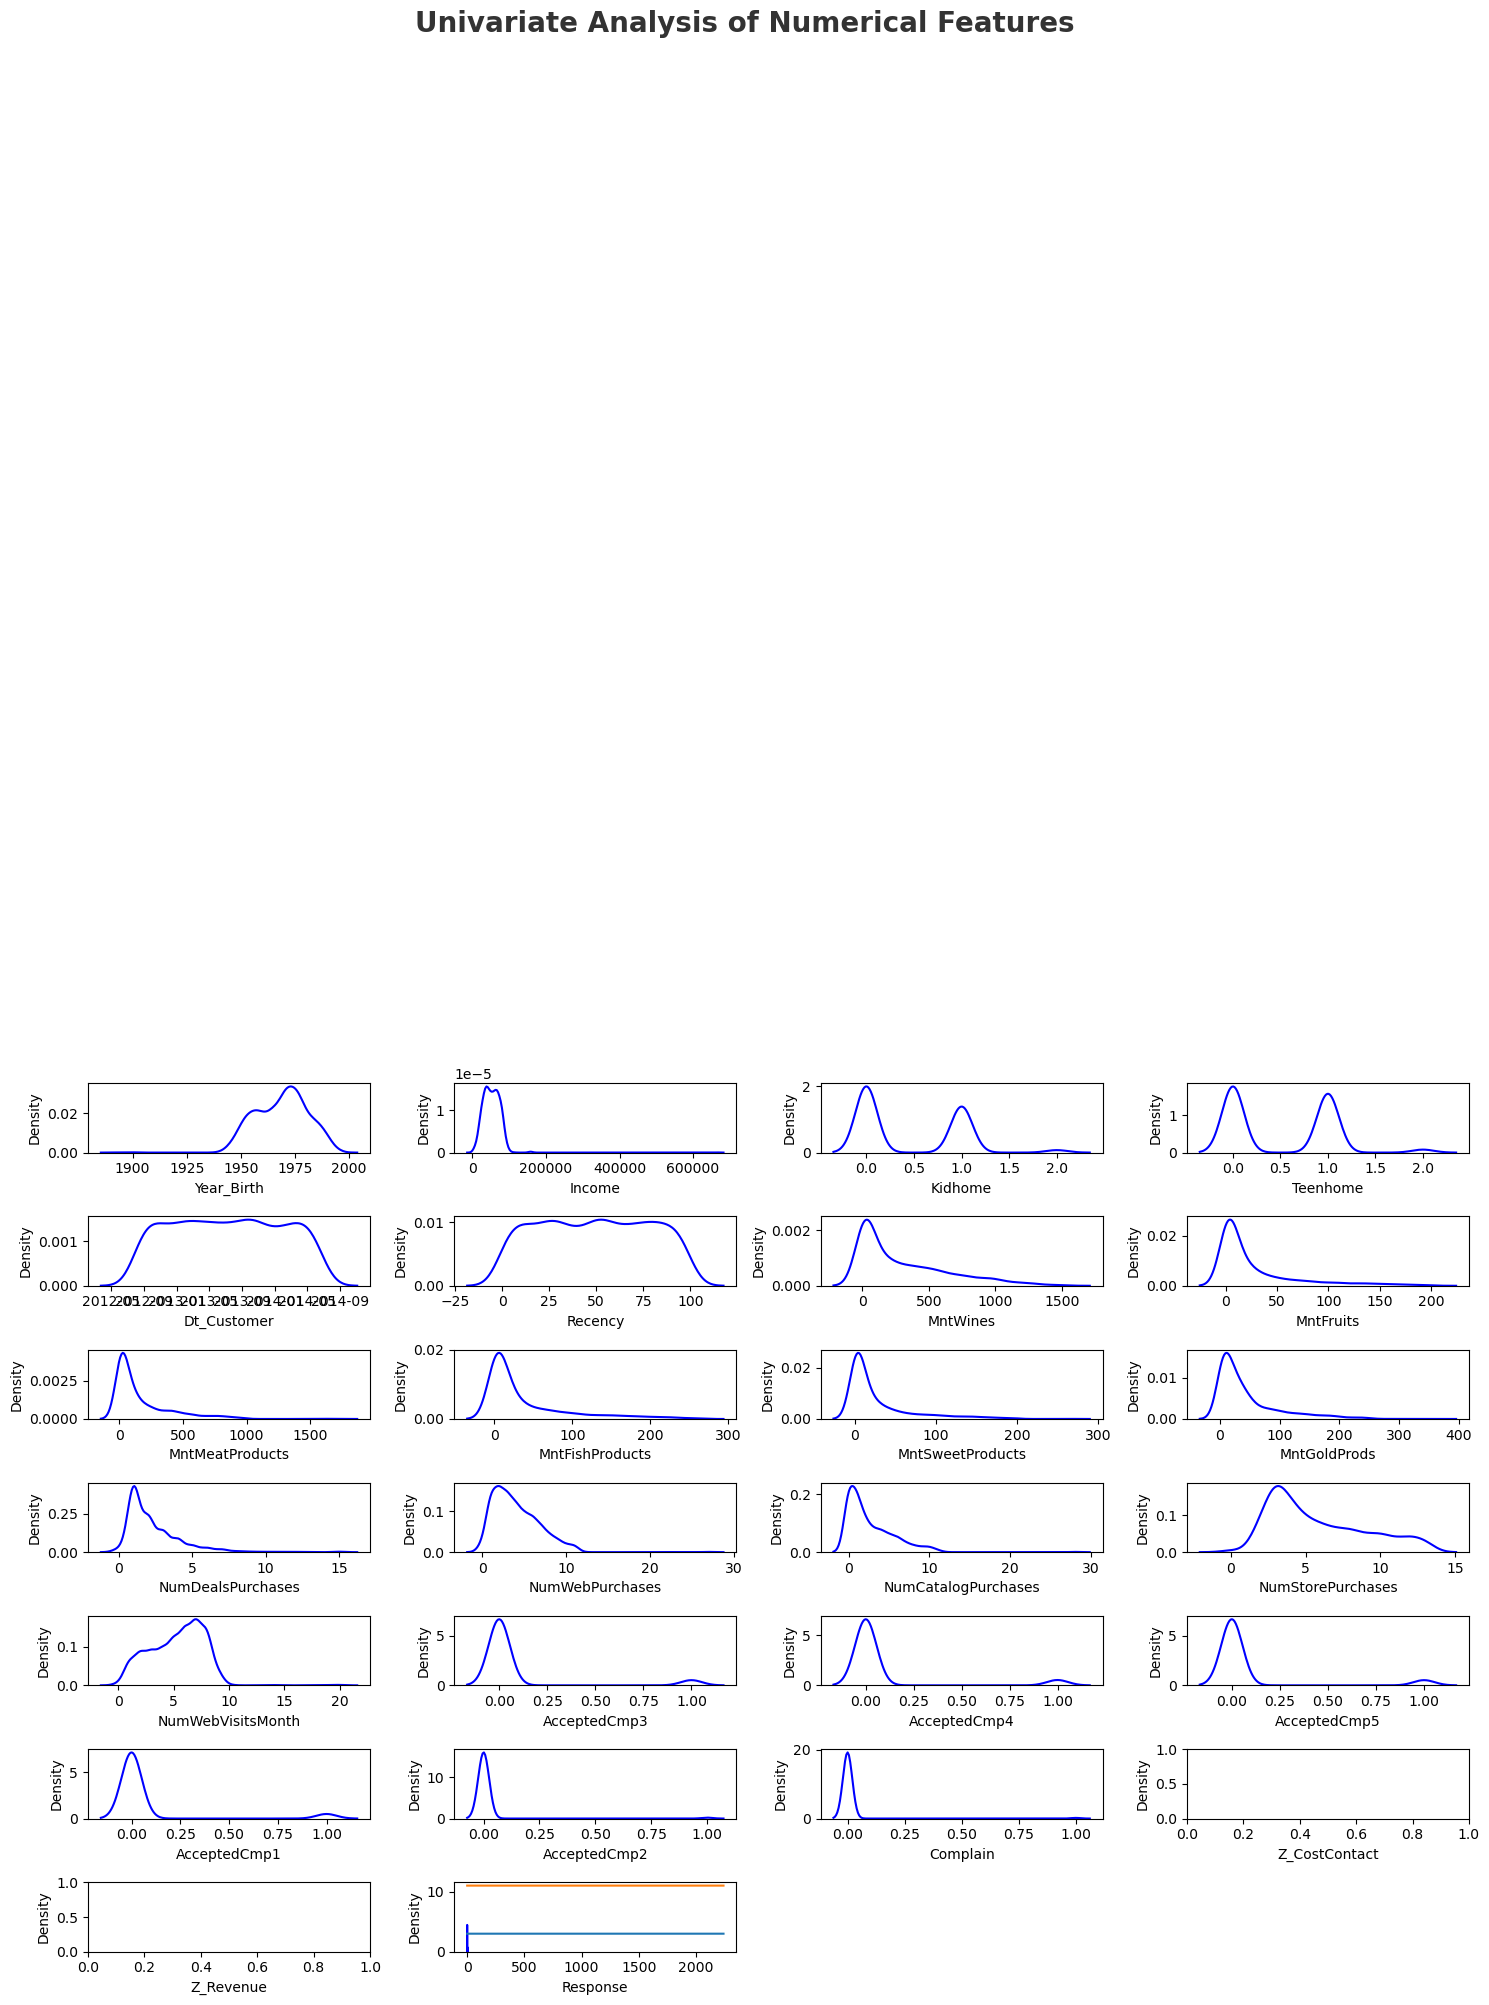

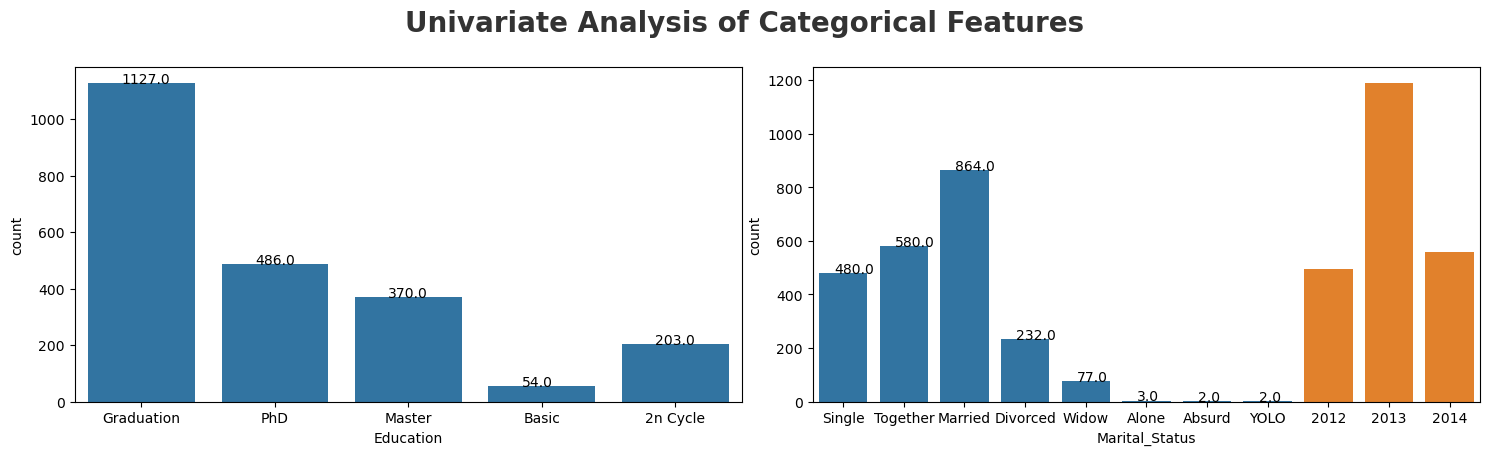

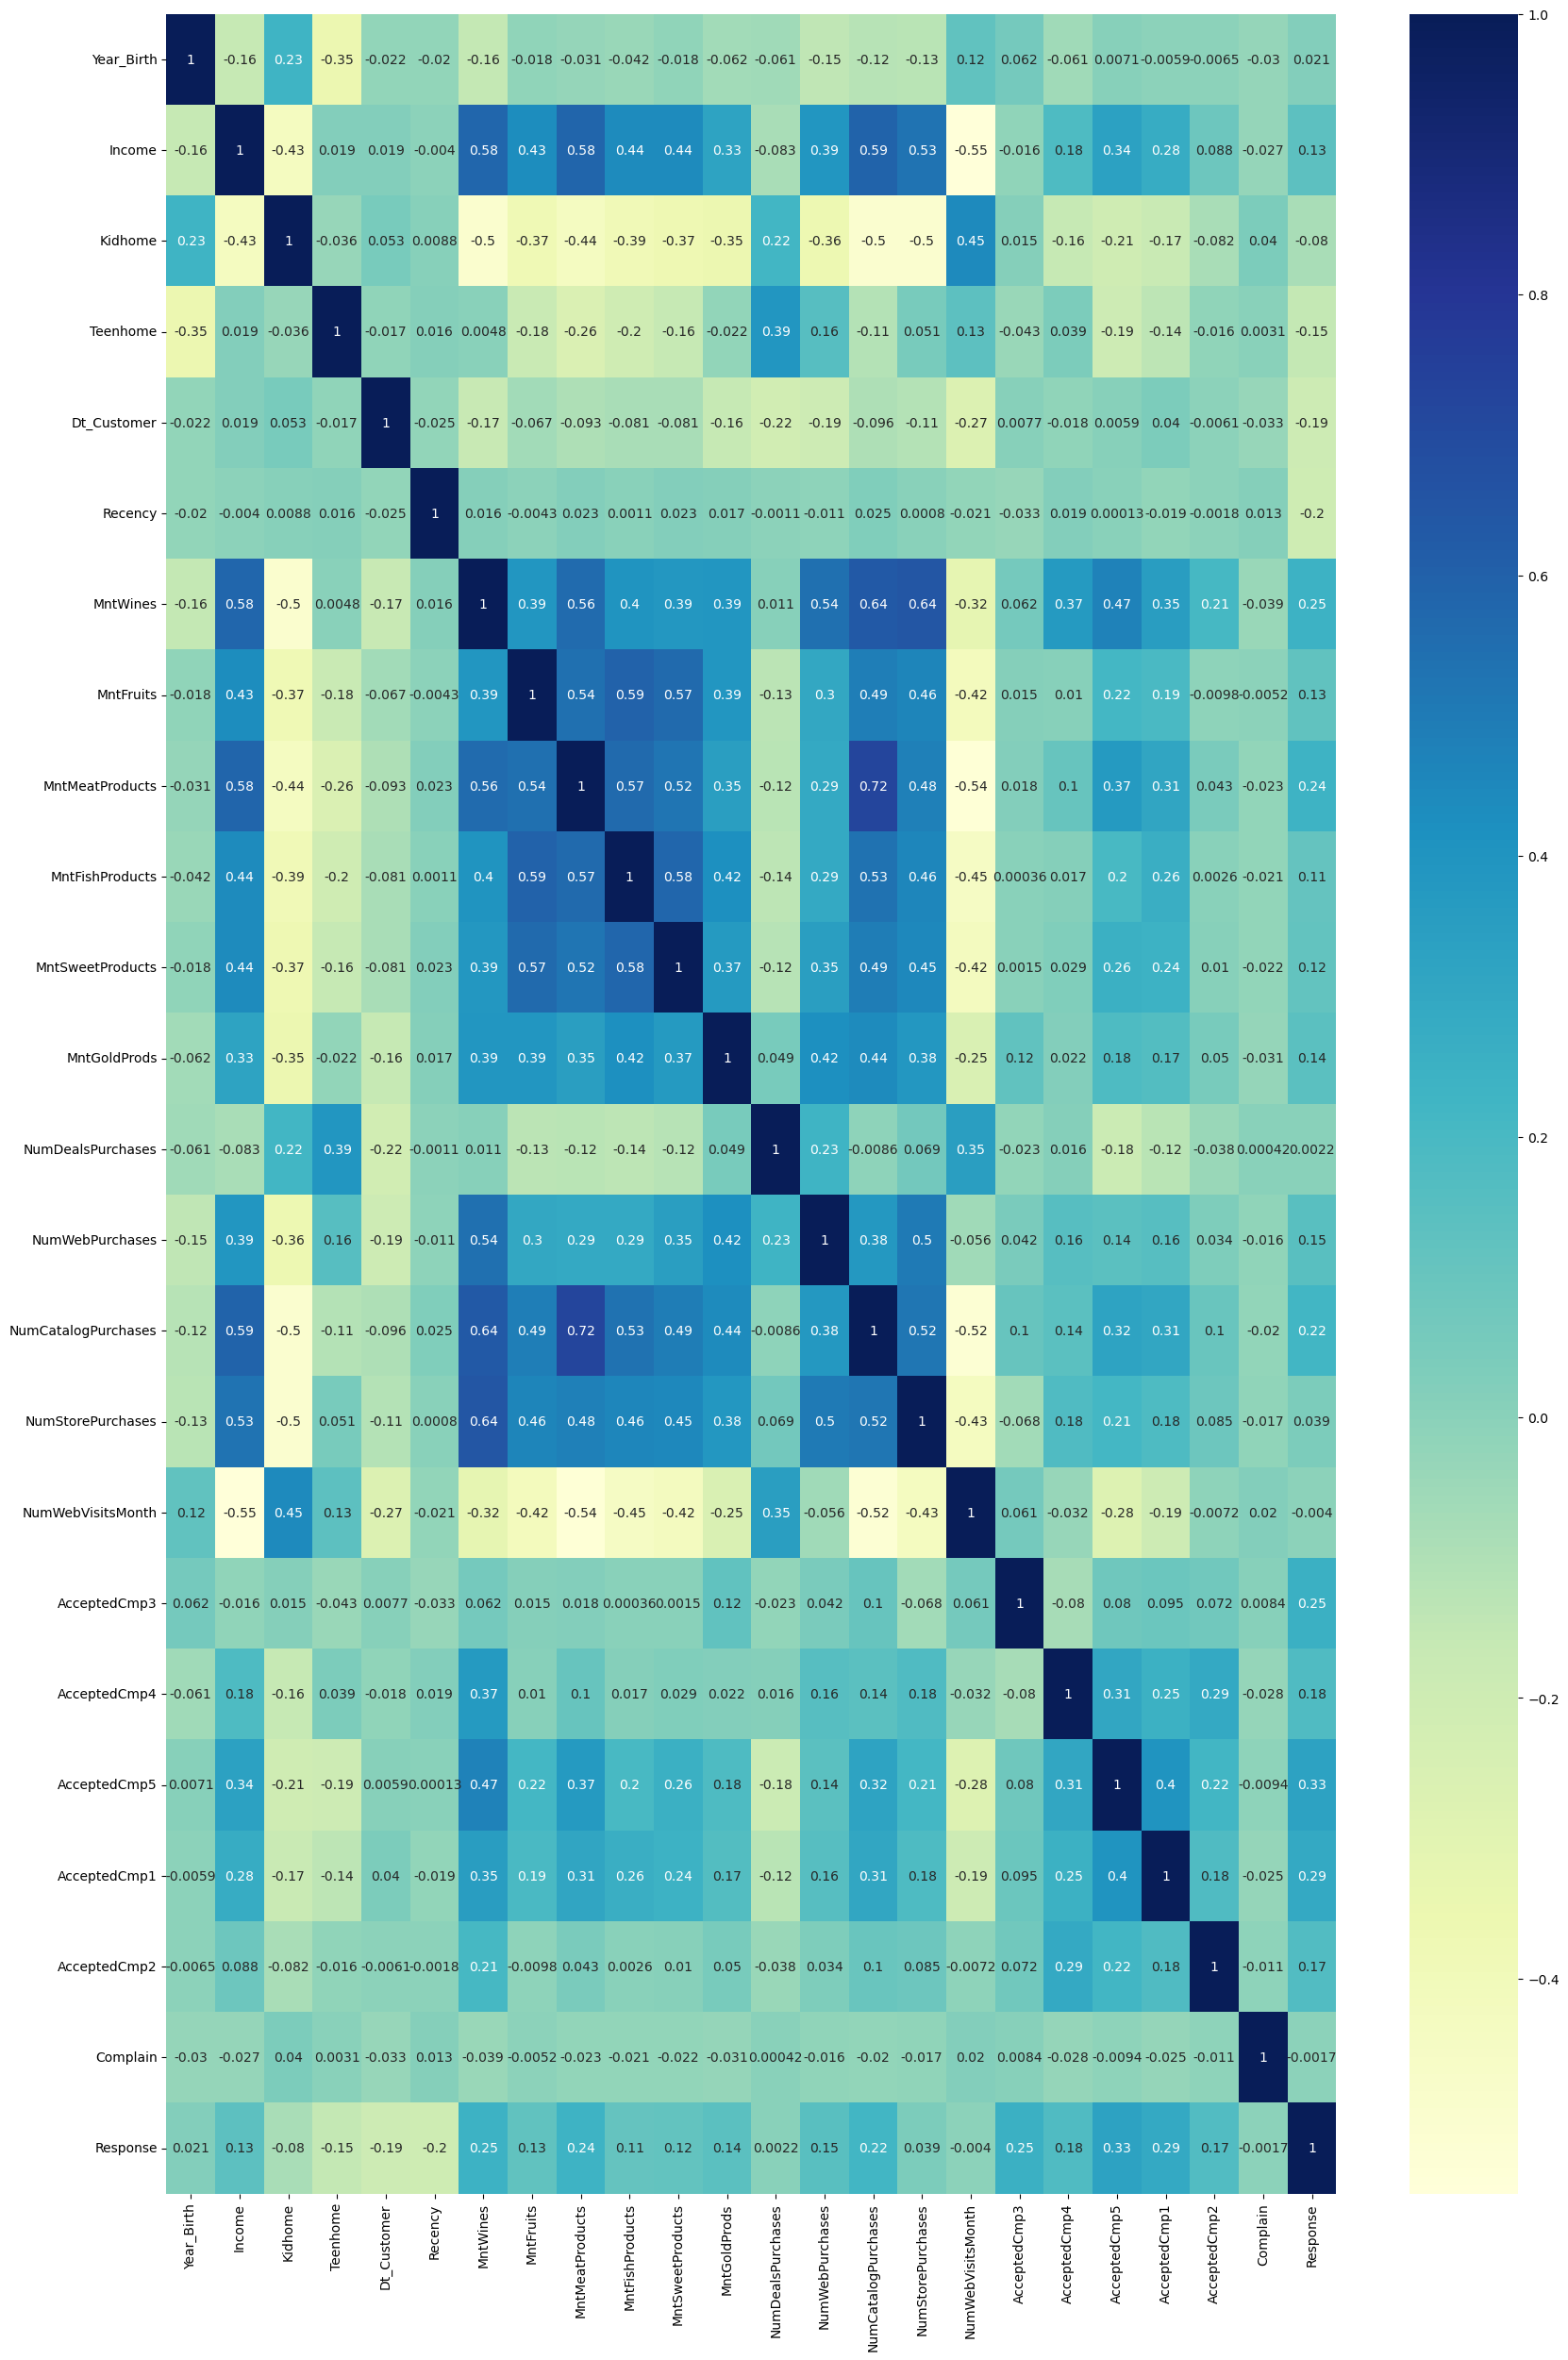

In [ ]:
plt.figure(figsize = (20,30))
num_features = numeric_features.copy()
num_features.remove('Z_CostContact')
num_features.remove('Z_Revenue')

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

**let's check the correlation in vif now**

**We can see that income does has some null values. Let's first input those values**

In [ ]:
#let's fill the income column with median income
df.Income.fillna(df.Income.median(), inplace=True)

# Feature Extraction

#### The following code creates features that would be helpful to describe the profile of the customer 

In [ ]:

from datetime import datetime

raw_df = df.copy() #saving the raw dataframe for reference


##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]


In [ ]:
columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'NumWebVisitsMonth']


### Multicollinearity Check
#### Variance Inflation Factor (VIF)
* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

        
#we will remove the datetime column which is not required for the vif checking
cont_features = continuous_features.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
cont_features.remove('Total_Spending')
compute_vif(cont_features, df)
# other_columns

,Variable,VIF
0,Age,1.075265
1,Income,2.125893
2,Days_as_Customer,1.275059
3,Recency,1.004938
4,Wines,2.642362
5,Fruits,1.933450
6,Meat,2.757364
7,Fish,2.068554
8,Sweets,1.898322
9,Gold,1.484205


#### Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity, but some choose a more conservative threshold of 5.
**As we can see the Vif for the columns are less than 5, we can safely assume that the data has not such correlations.

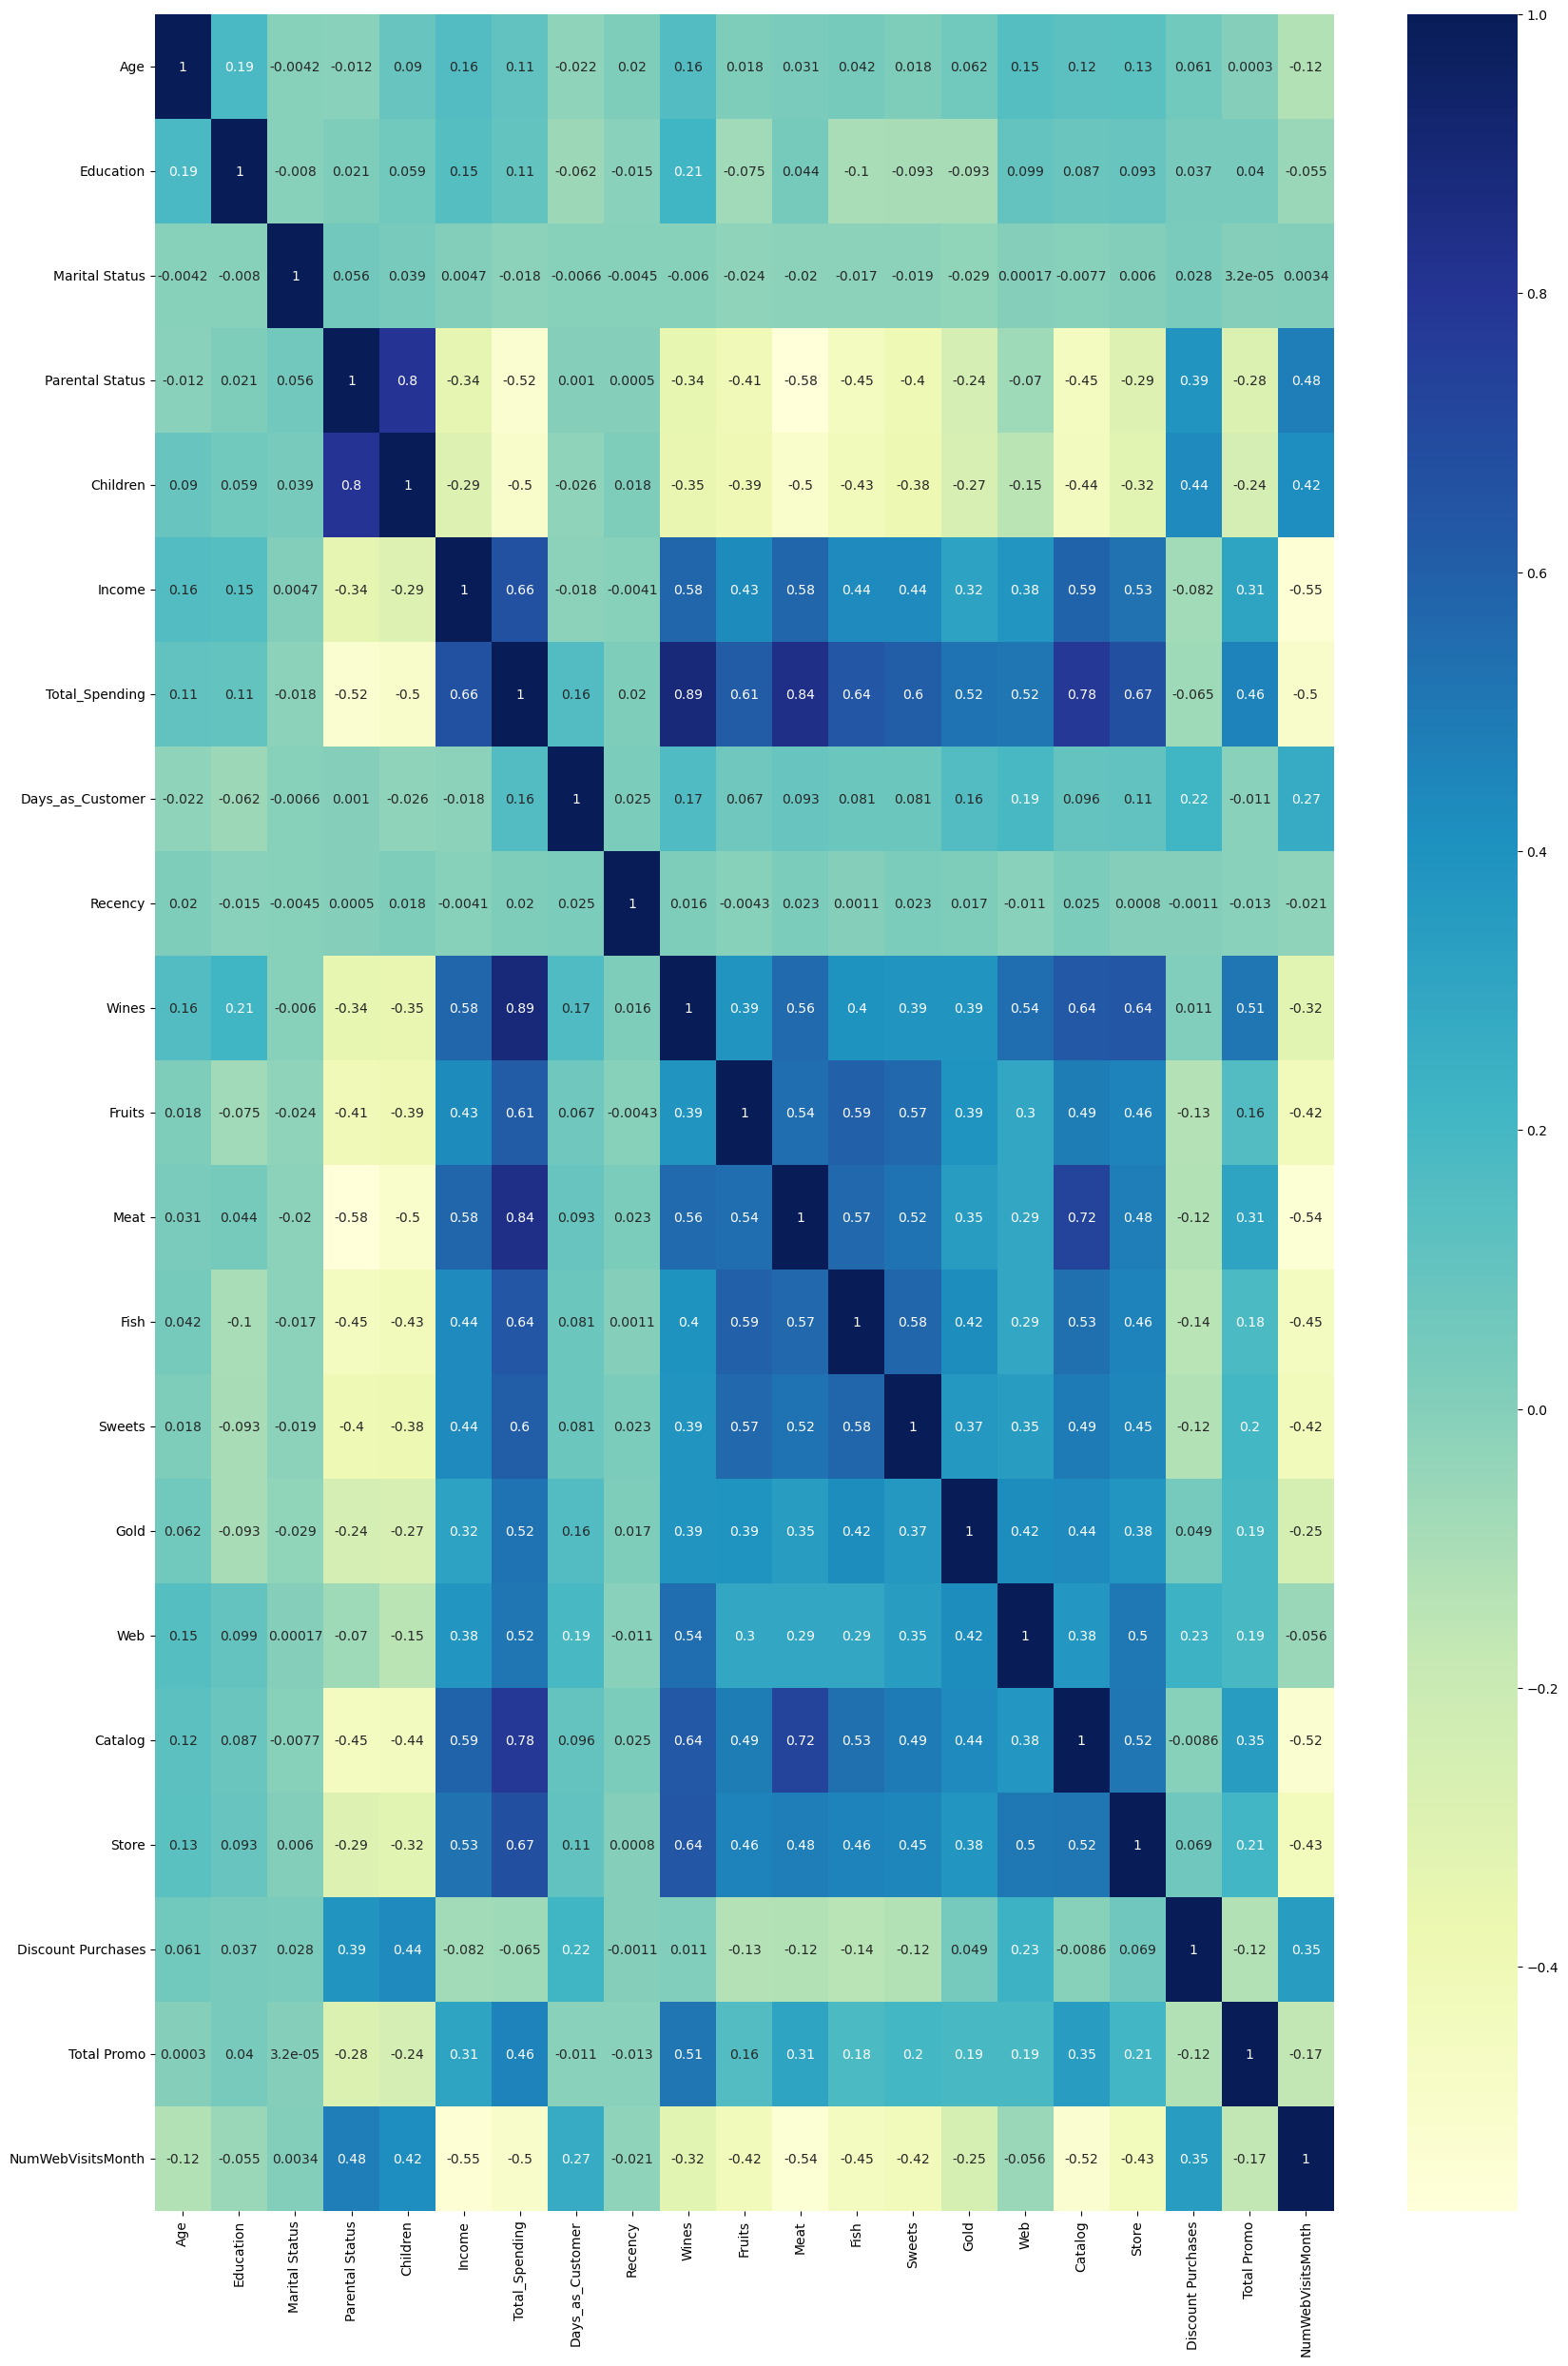

In [ ]:
plt.figure(figsize = (20,30))
num_features = numeric_features.copy()

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

### Checking Null Values

In [ ]:
df.isnull().sum()

Age                   0
Education             0
Marital Status        0
Parental Status       0
Children              0
Income                0
Total_Spending        0
Days_as_Customer      0
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweets                0
Gold                  0
Web                   0
Catalog               0
Store                 0
Discount Purchases    0
Total Promo           0
NumWebVisitsMonth     0
dtype: int64

**We can see there is null values in Income column, We can impute the null values in feature engineering steps.**

## Initial Analysis Report

* **There are missing values in the Income column.**
* **The ID column can be deleted because each row has unique values.**
* **There is no such target feature, so we can do clustering.**


## 4. Visualization

### 4.1 Do Men or Women, who are most in count?

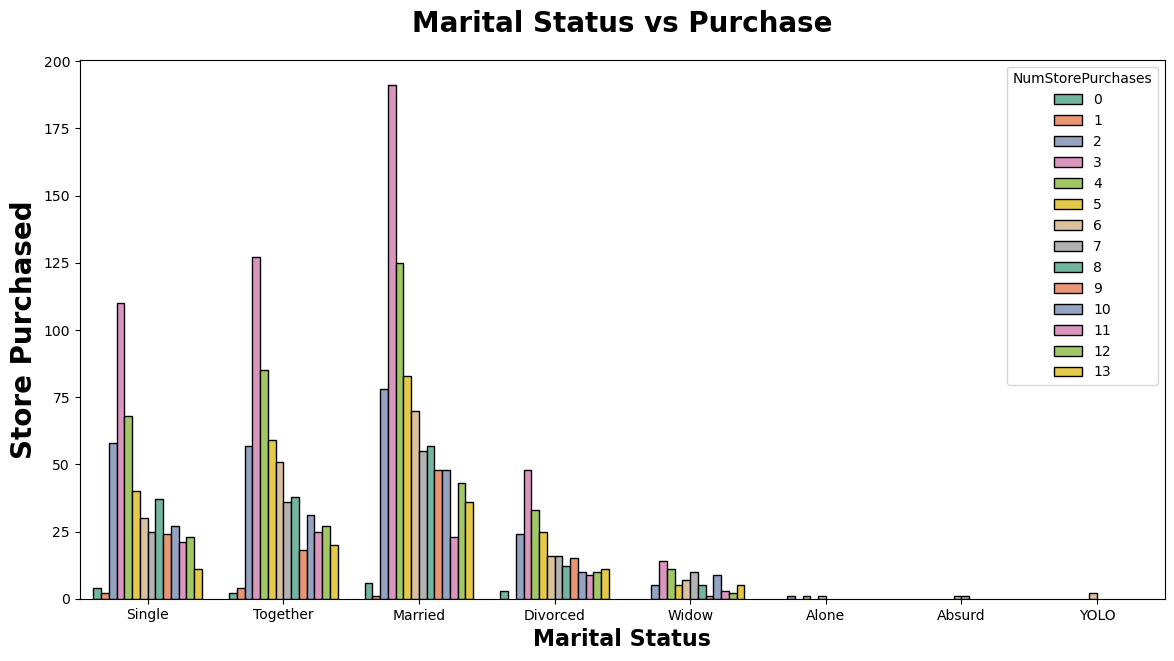

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Marital_Status",hue="NumStorePurchases", data=df1,ec = "black",palette="Set2")
plt.title("Marital Status vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Store Purchased", weight="bold", fontsize=20)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart, **Married** Customers bought more store products.
* **Divorces, Widow, Alone, Absurd and YOLO** category people baught very less.


**Report:**
* As per the Chart Male and Female customers who are Single has Purchased more than Divorced and Married and UnMarried.
* 33.18% of Single Customers, 24% of UnMarried Customers
* Followed by approx 13% of Divorced and Married Customers

In [ ]:
dates = []
for i in raw_df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-06-29
Oldest customer's enrolment date is 2012-07-30


**Report**
* The dataset contains customer data from `2012-07-30` to `2014-06-29`

In [ ]:
df.head()

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617,4788,58,635,88,546,172,88,88,8,10,4,3,0,7
1,68,2,0,1,2,46344.0,27,4238,38,11,1,6,2,1,6,1,1,2,2,0,5
2,57,2,1,0,0,71613.0,776,4437,26,426,49,127,111,21,42,8,2,10,1,0,4
3,38,2,1,1,1,26646.0,53,4264,26,11,4,20,10,3,5,2,0,4,2,0,6
4,41,4,1,1,1,58293.0,422,4286,94,173,43,118,46,27,15,5,3,6,5,0,5


In [ ]:
#setting plotting options

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#cce0ff","figure.facecolor":"#cce0ff"})
sns.set_context("poster",font_scale = .7)


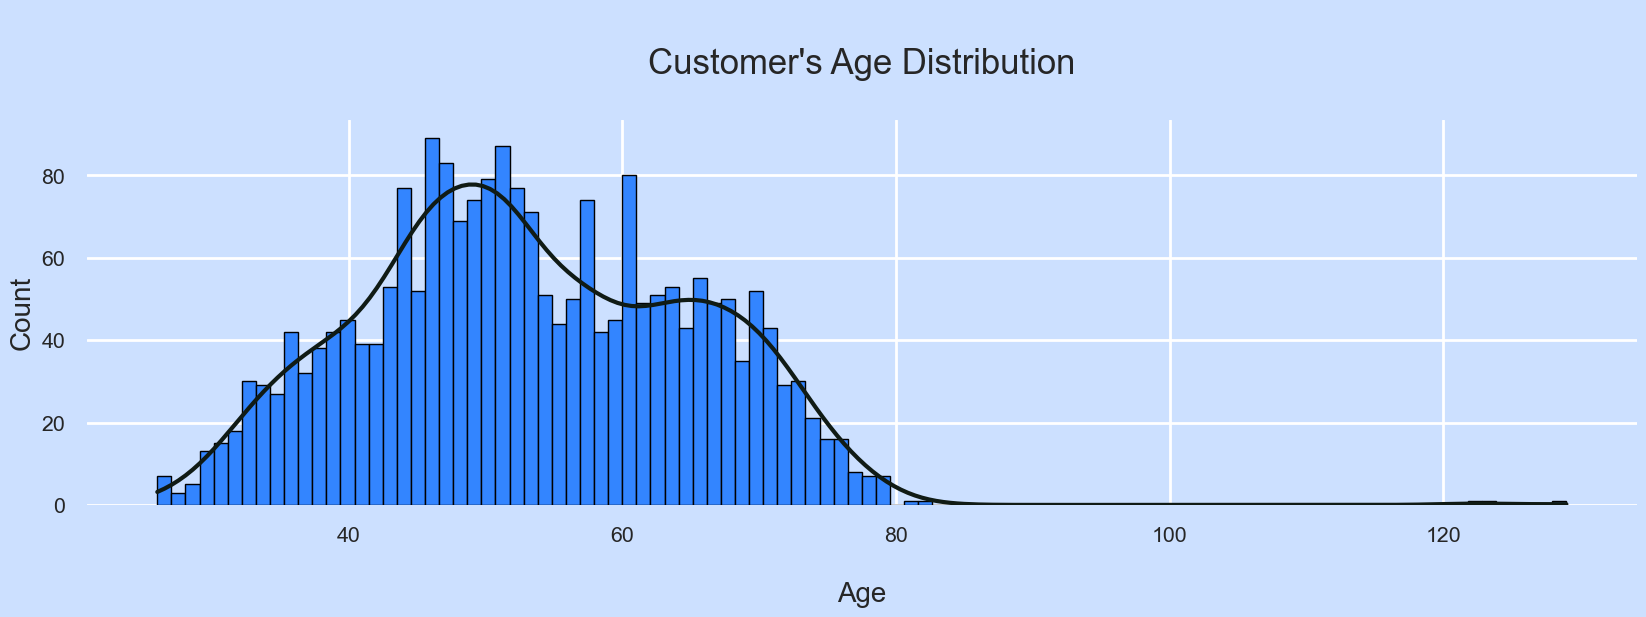

In [ ]:

plt.subplots(figsize=(20, 5))
plt.title("Let's have a look on the distribution of customer's age :", weight="bold",fontsize=20, pad=20)

p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**reports:**

* We can see it's a normal distribution of customer's age.
* We can see there's some outliers in the distribution. So we can remove the outliers from the Age column.


**As we can see most of the customers' age is 80 or less. So we can filter the data by age <90**

## Customer's Age Distribution

Let's have a look again on the distribution of customer's age :


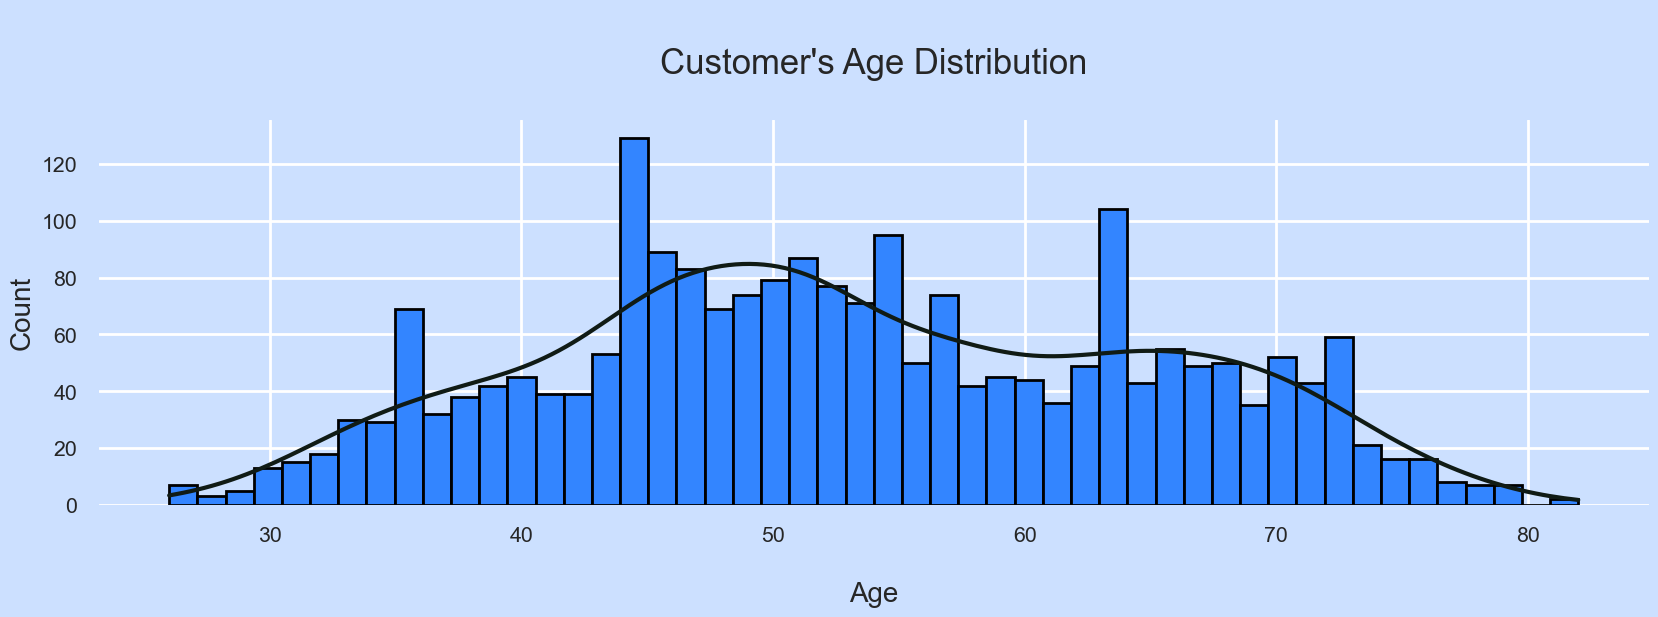

In [ ]:
df = df[df["Age"] < 90]

#let's plot now
print(f"Let's have a look again on the distribution of customer's age :")

plt.subplots(figsize=(20, 5))
p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()


**report**
* We can see it's a normal distribution of customer's age.
* Most of the customers are from 43 to 57.


## Customer's Income-Spending Distribution

Let's have a look on the distribution of customer's income and spending :


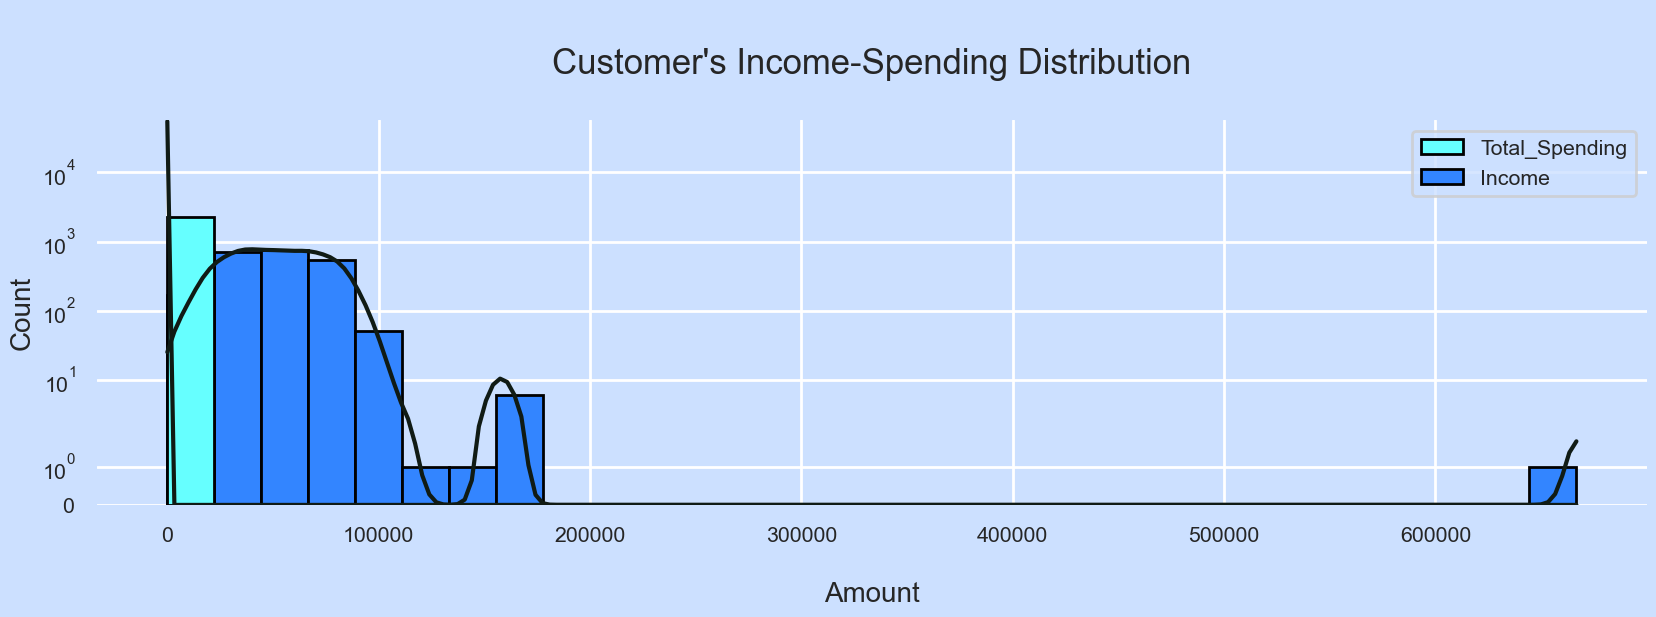

In [ ]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 5))
p = sns.histplot(df[["Total_Spending","Income"]],palette=["#66ffff","#3385ff"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.lines[1].set_color("#101B15")
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

- **reports**

    - Income Column Does have some outliers which are seen after 60,00,00, so we can filter them out

## Customer's Income-Spending Distribution

Let's have a look again on the distribution of customer's income and spending :


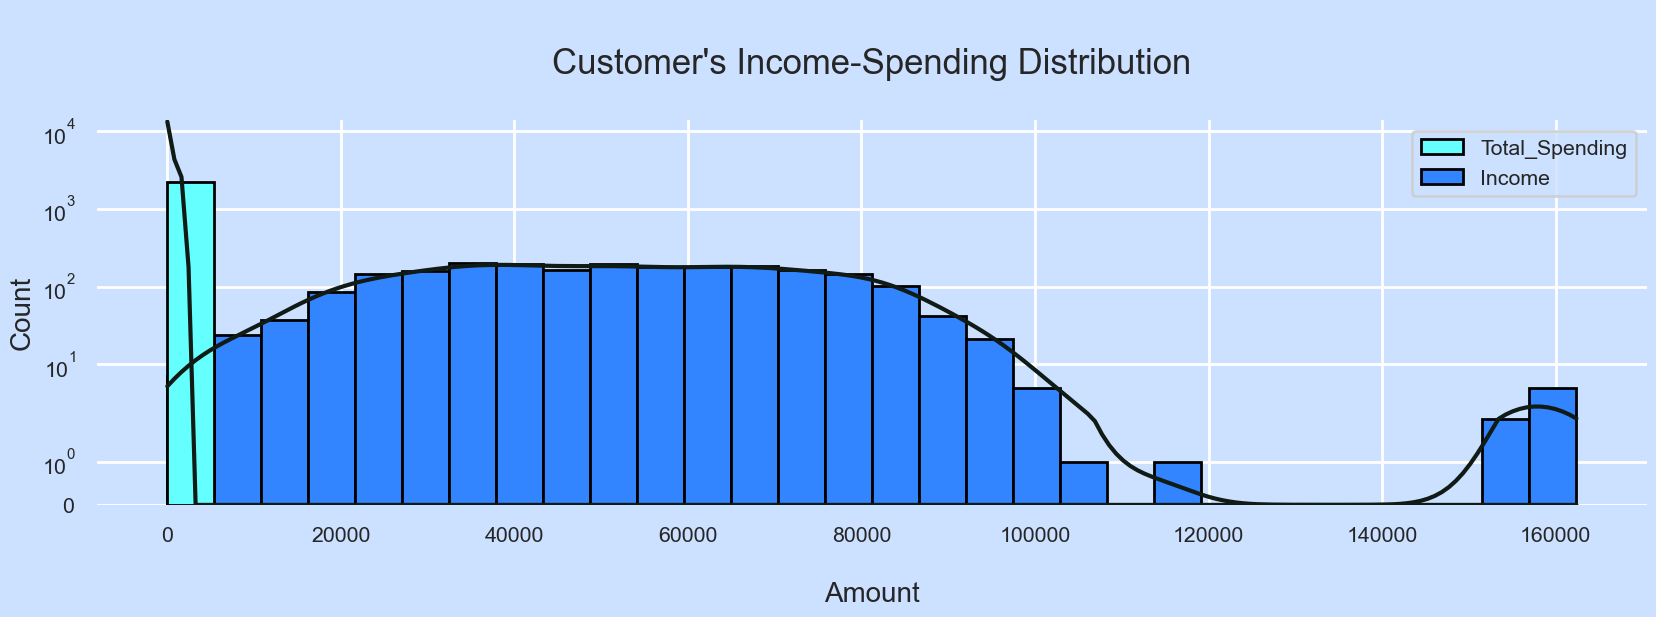

In [ ]:
df = df[df["Income"] < 600000]

#now, let's plot again
print(f"Let's have a look again on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 5))
p = sns.histplot(df[["Total_Spending","Income"]],palette=["#66ffff","#3385ff"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.lines[1].set_color("#101B15")
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

- Most of the customers income range is in between 20000 to 80000
- Bust almost all customers spend very few portion of their income.

## Customer's Education Level plot

Let's have a look on the customer's education :


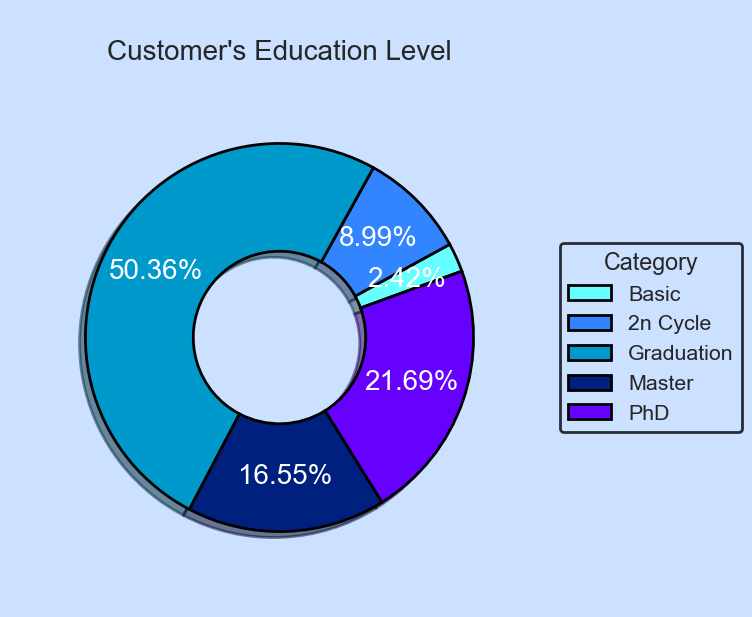

In [ ]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(7, 7))

labels = "Basic","2n Cycle", "Graduation", "Master", "PhD"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2],
                                    df["Education"].value_counts()[3],
                                    df["Education"].value_counts()[4]],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#66ffff","#3385ff","#0099cc","#002080","#6600ff"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 2),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

**Insights:**

- Customers have three education levels : Basic, 2n Cycle, Graduation, Master, PhD
- 50.41% have completed graduation, 16.50% are doing masters, 21.70% are persuing PhD, 8.95% are in 2n Cycle study and 2.44% have done basic education 

## Education Level-wise Spending Distribution

Let's have a look on the distribution of customer's income and spending on basis of education level :


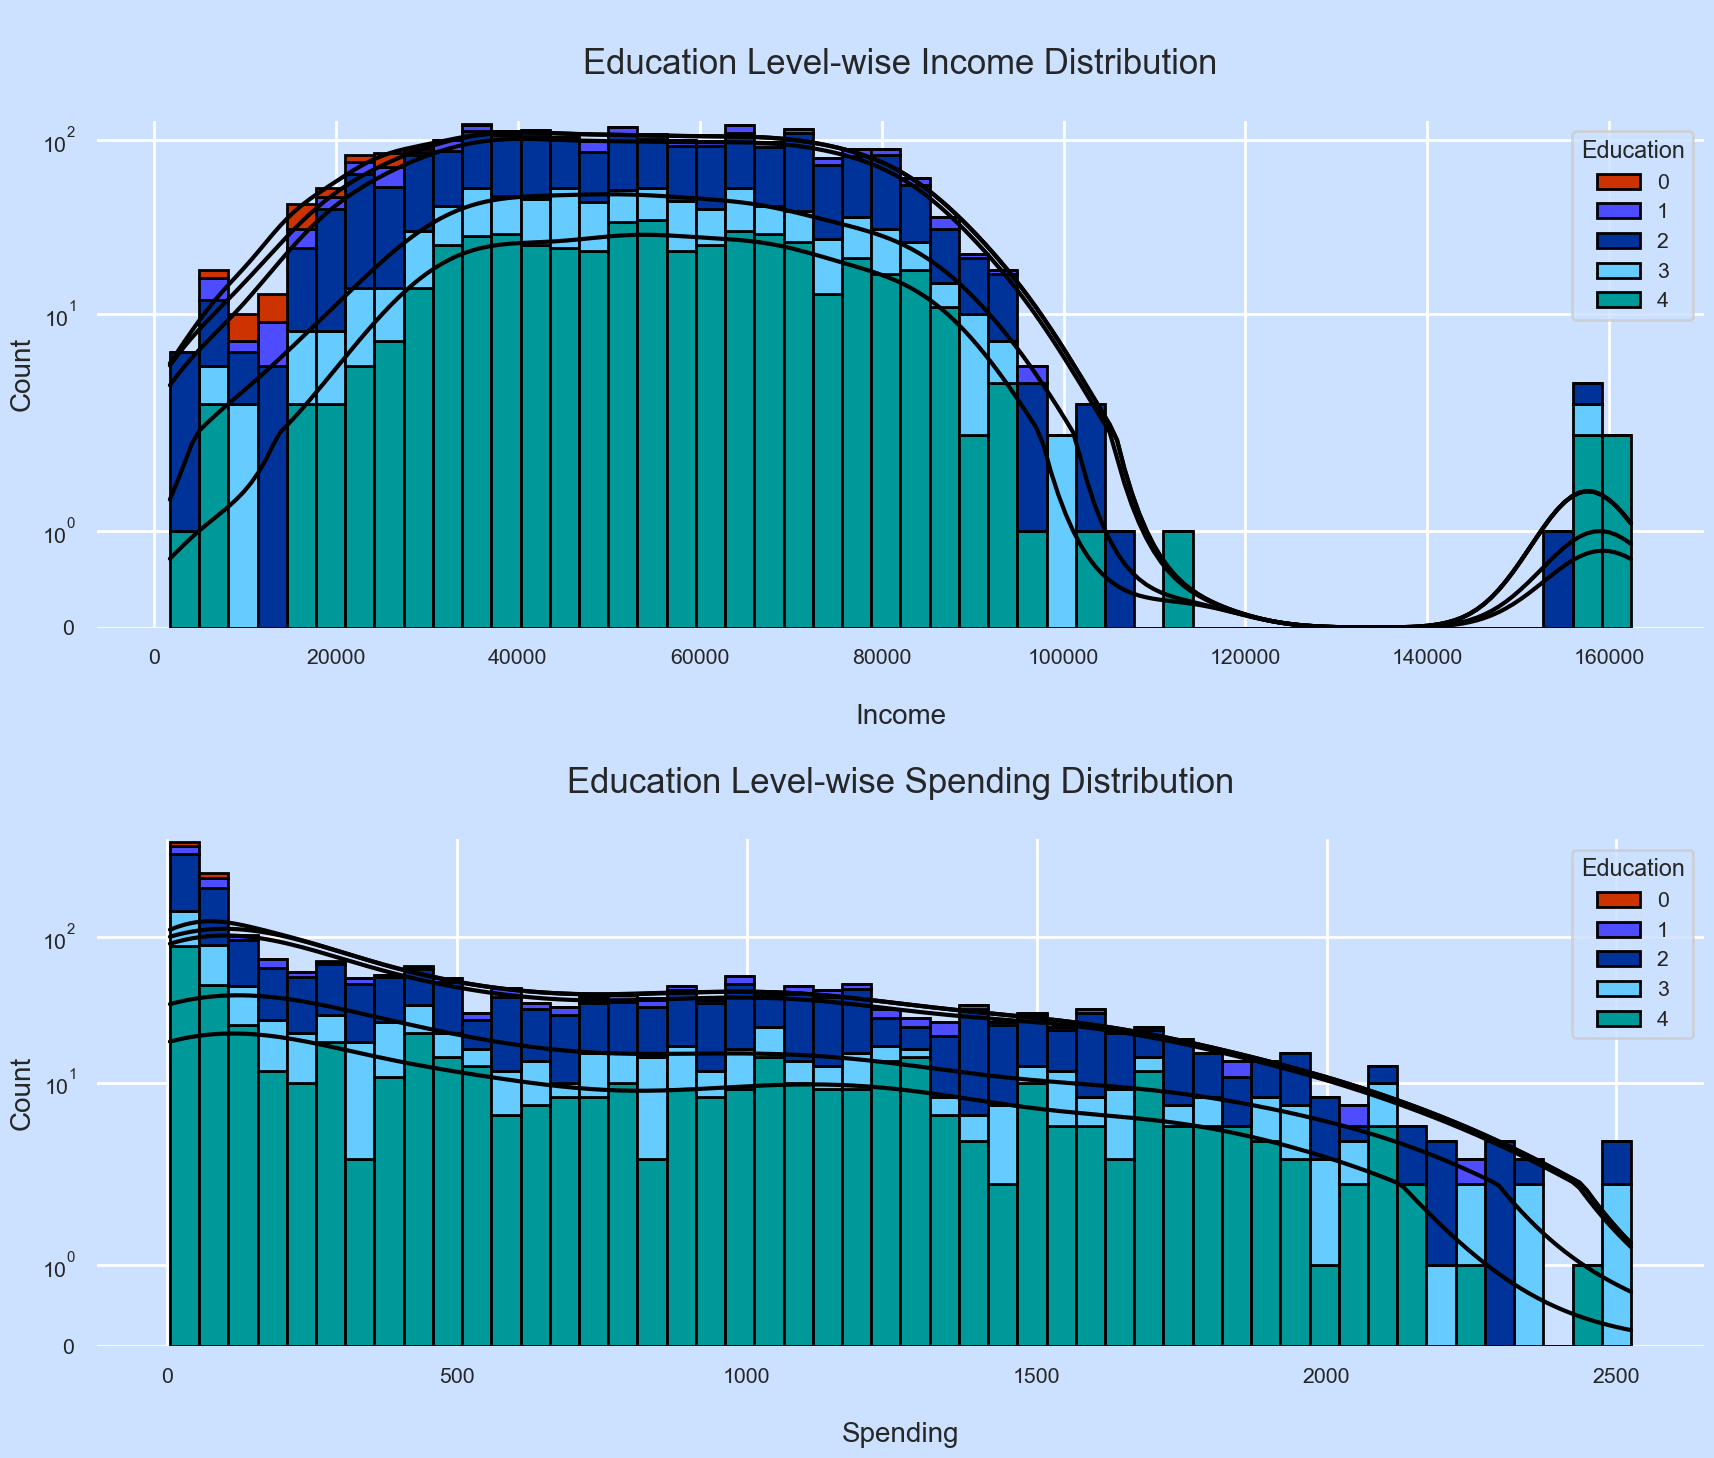

In [ ]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

colors = ["#cc2900","#0000ff","#66ffff", "#009999","#99ff66"]
colors2 = ["#cc3300","#4d4dff","#003399","#66ccff","#009999"]
sns.histplot(data=df,x="Income",hue="Education",multiple="stack",palette=colors2,ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[0].lines[0].set_color("000000")
axes[0].lines[1].set_color("000000")
axes[0].lines[2].set_color("000000")
axes[0].lines[3].set_color("000000")
axes[0].lines[4].set_color("000000")

axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)

sns.histplot(data=df,x="Total_Spending",hue="Education",multiple="stack",palette=colors2,ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[1].lines[0].set_color("000000")
axes[1].lines[1].set_color("000000")
axes[1].lines[2].set_color("000000")
axes[1].lines[3].set_color("000000")
axes[1].lines[4].set_color("000000")
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

- Most of the undergraduate level customer's income range is in between 10000 to 80000 and spending in between 0 to 1400.
- Most of the graduate level customer's income range is in between 20000 to 85000 and spending in between 0 to 2000.
- Most of the postgraduate level customer's income range is in between 30000 to 80000 and spending in between 0 to 2000.

### Customer's Children Count

Let's have a look on the distribution of customer's children :


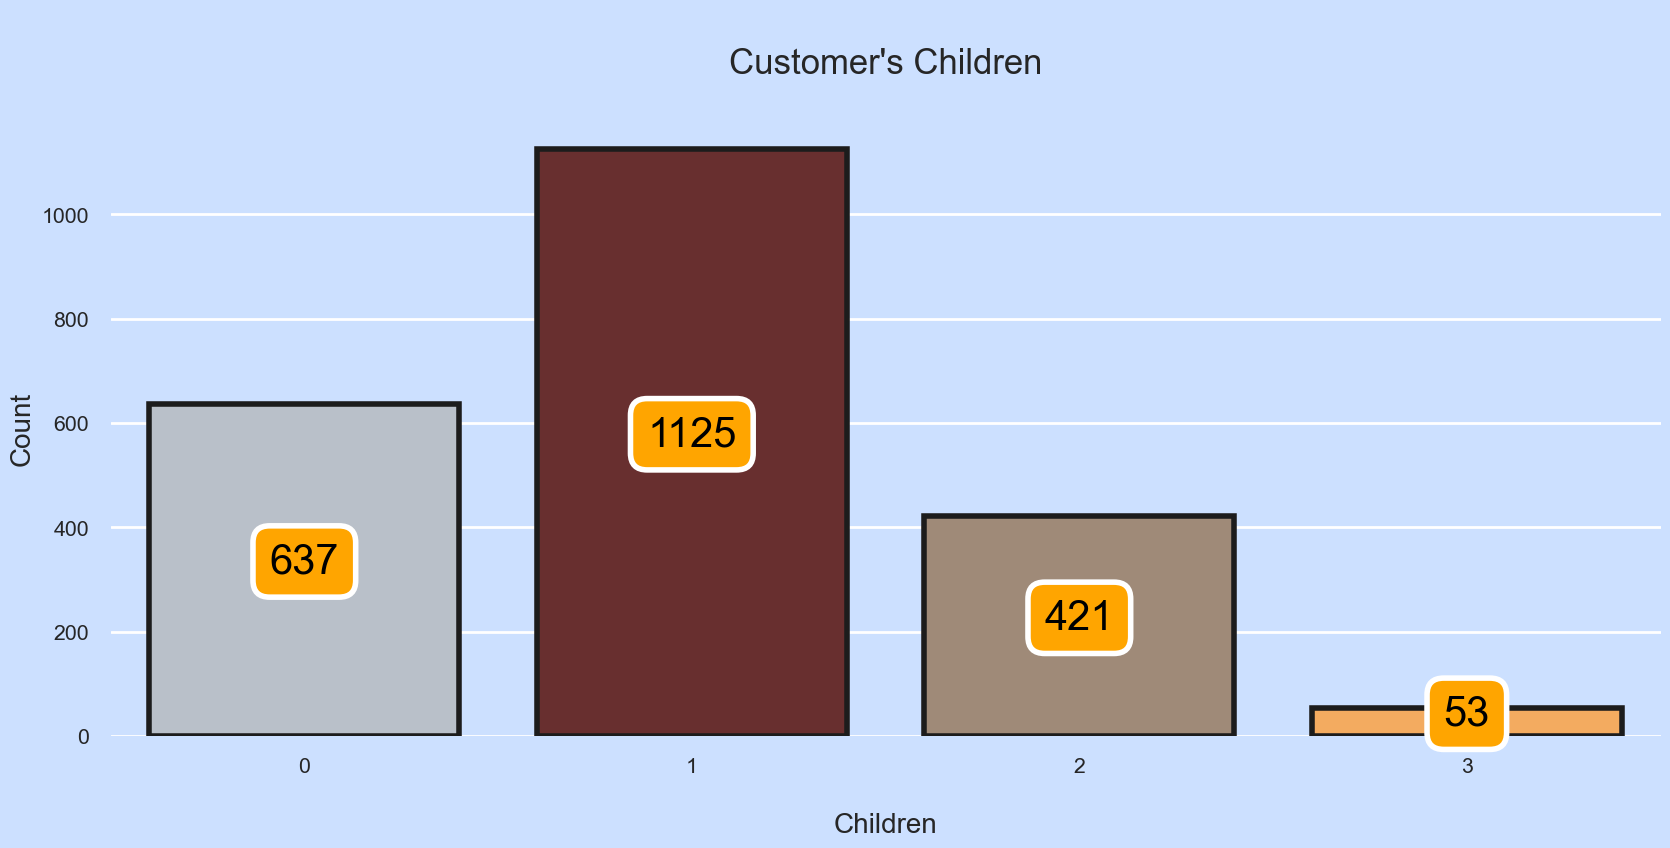

In [ ]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Children"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Report:**

- 632 customers have no child.
- Most of the customers have one child.
- 416 customers have two child.
- 50 customers have three child.

## Final report
- We have seen that this dataset has outliers in Wines, Fruits, Meat, Fish, Sweets, Gold, Age, Total_Spending columns
and multicollinearity in Total_Spending,Wines,Fruits,Meat,Fish,Sweets,Gold columns. So we have to handle those in feature engineering steps.

- We have dropped the ID column as it is not going to participate in any model building task
- The column Z_CostContact, Z_Revenue does have constant values. As this columns does not have any varience, we have dropped this column

- There are some columns which individually does not have such meaning, so in feature engineering we'll retrieve new columns. 